In [8]:
%pip install tensorflow-metal tensorflow-macos


  Using cached tensorboard-2.16.2-py3-none-any.whl.metadata (1.6 kB)
  Using cached numpy-1.26.4-cp312-cp312-macosx_11_0_arm64.whl.metadata (61 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 MB 11.5 MB/s eta 0:00:0000:0100:01
Using cached numpy-1.26.4-cp312-cp312-macosx_11_0_arm64.whl (13.7 MB)
Using cached tensorboard-2.16.2-py3-none-any.whl (5.5 MB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.28.3
    Uninstalling protobuf-5.28.3:
      Successfully uninstalled protobuf-5.28.3
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-

In [1]:

import tensorflow as tf
random_seed= 0

# 현재 사용 가능한 GPU 확인
print("GPU Available: ", tf.config.list_physical_devices('GPU'))

GPU Available:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


# 14. Computer Vsion with CNN


### 14.2 CNN Layer


### 14.2.1 Filter(Kernel)

- creates **feature map** with filters


### 14.2.2 Stacking various feature map

- pratical CNN layer has many filters and each filter generate a single feature map
- Single CNN layer apply many filters to a input to detect various features

### 합성곱층 설명 (예제와 숫자)

| **요소**           | **설명**                                             | **예시 (숫자)**                                                                 |
| ------------------ | ---------------------------------------------------- | ------------------------------------------------------------------------------- |
| **입력 크기**      | 입력 데이터의 높이, 너비, 채널.                      | \( 32 X 32 X 3 \) (이미지 크기 32x32, RGB 채널).                                |
| **출력 크기**      | 필터 적용 후 생성된 특성 맵의 높이, 너비, 필터 개수. | \( 30 X 30 X 10 \) (필터 크기 \( 3 X 3 \), 10개의 필터 사용).                   |
| **특성 맵의 픽셀** | 특성 맵의 각 픽셀은 하나의 뉴런.                     | 특성 맵 \( 30 X 30 \) → 각 픽셀은 \( 3 X 3 X 3 \) 영역에서 값 계산.             |
| **파라미터 공유**  | 동일 필터 내의 뉴런은 같은 파라미터를 공유.          | 한 필터: \( 3 X 3 X 3 + 1 = 28 \)개의 파라미터. 10개 필터: \( 28 X 10 = 280 \). |
| **수용장의 확장**  | 한 뉴런은 입력 데이터의 특정 영역을 참조.            | \( 3 X 3 \) 높이와 너비 + 3 채널 → \( 27 \)개의 입력.                           |
| **여러 필터**      | 여러 필터가 다양한 입력 특성을 감지.                 | 가로선, 세로선, 텍스처 등 감지 가능.                                            |


### 14.2.3 CNN with Keras

- Default padding is "valid", could set "same"


In [2]:
from sklearn.datasets import load_sample_images
import tensorflow as tf

images = load_sample_images()['images']
images = tf.keras.layers.CenterCrop(height = 70, width = 120)(images)
images = tf.keras.layers.Rescaling(scale= 1 / 255)(images)
images.shape # it's a 4D tensor

TensorShape([2, 70, 120, 3])

#### 2D CNN


In [8]:
# Create 2D CNN layer
# This layer create 32 filters with size 7 x 7 x x 3 (same as the input channel)
conv_layer = tf.keras.layers.Conv2D(filters=32, kernel_size=7)
fmaps = conv_layer(images)
fmaps.shape

TensorShape([2, 64, 114, 32])

In [9]:
# Create 2D CNN layer with same padding
conv_layer = tf.keras.layers.Conv2D(filters=32, kernel_size=7,padding='same')
fmaps = conv_layer(images)
fmaps.shape

TensorShape([2, 70, 120, 32])

### 14.2.4 Memory requirement

- CNN requires a lot of memory
- suppose the input image is 150 X 100 with 3 RGB channel
- with 200 filters of 5 X 5 CNN layer, and the batch size is 100 then the required memory is 200(filter) X 150(with neurons) X 100(height neurons) X 32(32 bits) = 12 MB for each sample


# 14.3 Pooling Layer

- create a subsmaple to reduce the prameter which reduces the computation, memory usage and overfitting
- Mostly use the **Max Pooling Layer**
- it gives good amount of **invariance** which advantageous the model is not too sensitive to the little changes
- depends on the project goal, sometimes the **equvariance** is more required(sensitive the the little change)


# 14.4 Pooling Layer with Keras

- by default pooling layer used valid padding
- the modern models use **global average pooling layer** for the last layer, which gives a single average value for each feature map


In [11]:
max_pool = tf.keras.layers.MaxPool2D(pool_size=2)
global_avg_pool = tf.keras.layers.GlobalAveragePooling2D()

global_avg_pool(images) # it returns the average RGB strength for each sample 

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0.64338624, 0.5971759 , 0.5824972 ],
       [0.76306933, 0.2601113 , 0.10849128]], dtype=float32)>

# 14.5 CNN Structure

- general CNN
- INPUT -> CNN -> Pool -> CNN .... -> Pool -> FC -> Output
- it's better to use many small kernels than a few large kernels
- But the input layer commonly use more than 5X5 with stride 2
- As the model gets to the output layers, # of filter should be larger, gernerally, twice the filter after the Max pool


In [2]:
import numpy as np 


mnist = tf.keras.datasets.fashion_mnist.load_data()

(X_train_full, y_train_full), (X_test, y_test) = mnist
X_train_full = np.expand_dims(X_train_full, axis=-1).astype(np.float32) / 255
X_test = np.expand_dims(X_test.astype(np.float32), axis=-1) / 255
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]



from functools import partial

tf.random.set_seed(42)  # 추가 코드 - 재현성 보장
DefaultConv2D = partial(tf.keras.layers.Conv2D, kernel_size=3, padding="same",
                        activation="relu", kernel_initializer="he_normal")
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape = X_train.shape[1:]),
    DefaultConv2D(filters=64, kernel_size=7),
    tf.keras.layers.MaxPool2D(),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    tf.keras.layers.MaxPool2D(),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=64, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=10, activation="softmax")
])

# 추가 코드 - 모델을 컴파일, 훈련, 평가하고 예측을 만듭니다.
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam",
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))
score = model.evaluate(X_test, y_test)
print(f"Score: {score}")
X_new = X_test[:10]  
y_pred = model.predict(X_new)

Epoch 1/10


2025-02-02 15:18:23.657708: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2025-02-02 15:18:23.657730: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 18.00 GB
2025-02-02 15:18:23.657735: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 6.00 GB
2025-02-02 15:18:23.657749: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-02-02 15:18:23.657759: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2025-02-02 15:18:24.378949: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1634/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.6050 - loss: 1.1201

KeyboardInterrupt: 

### 14.5.1 LeNet-5

| Layer # | Layer Type        | Input Shape        | Output Shape | Kernel Size | Stride | Activation Function |
| ------- | ----------------- | ------------------ | ------------ | ----------- | ------ | ------------------- |
| 1       | Convolutional     | 32x32x1            | 28x28x6      | 5x5         | 1      | Tanh                |
| 2       | Subsampling (Avg) | 28x28x6            | 14x14x6      | 2x2         | 2      | Tanh                |
| 3       | Convolutional     | 14x14x6            | 10x10x16     | 5x5         | 1      | Tanh                |
| 4       | Subsampling (Avg) | 10x10x16           | 5x5x16       | 2x2         | 2      | Tanh                |
| 5       | Fully Connected   | 5x5x16 (flattened) | 120          | -           | -      | Tanh                |
| 6       | Fully Connected   | 120                | 84           | -           | -      | Tanh                |
| 7       | Fully Connected   | 84                 | 10 (Output)  | -           | -      | Softmax             |

### 설명

1. **Conv Layer 1**: 5x5 커널로 6개의 필터 적용, 입력을 28x28x6으로 변환.
2. **Subsampling Layer 1**: 2x2 필터로 평균 풀링(Avg Pooling), 출력은 14x14x6.
3. **Conv Layer 2**: 5x5 커널로 16개의 필터 적용, 출력은 10x10x16.
4. **Subsampling Layer 2**: 평균 풀링 적용 후 출력은 5x5x16.
5. **Fully Connected 1**: 5x5x16을 1D로 펼쳐 120개의 뉴런으로 연결.
6. **Fully Connected 2**: 120개의 뉴런을 84개의 뉴런으로 연결.
7. **Output Layer**: 84개의 뉴런에서 최종적으로 10개의 클래스 출력(Softmax 활성화 함수).

LeNet-5는 주로 손글씨 숫자(MNIST 데이터셋) 인식을 위해 설계됨 근데 좀 오래되서 안씀


### 14.5.2 AlexNet

| Layer # | Layer Type      | Input Shape         | Output Shape  | Kernel Size | Stride | Padding | Activation Function |
| ------- | --------------- | ------------------- | ------------- | ----------- | ------ | ------- | ------------------- |
| 1       | Convolutional   | 227x227x3           | 55x55x96      | 11x11       | 4      | VALID   | ReLU                |
| 2       | Max Pooling     | 55x55x96            | 27x27x96      | 3x3         | 2      | -       | -                   |
| 3       | Convolutional   | 27x27x96            | 27x27x256     | 5x5         | 1      | SAME    | ReLU                |
| 4       | Max Pooling     | 27x27x256           | 13x13x256     | 3x3         | 2      | -       | -                   |
| 5       | Convolutional   | 13x13x256           | 13x13x384     | 3x3         | 1      | SAME    | ReLU                |
| 6       | Convolutional   | 13x13x384           | 13x13x384     | 3x3         | 1      | SAME    | ReLU                |
| 7       | Convolutional   | 13x13x384           | 13x13x256     | 3x3         | 1      | SAME    | ReLU                |
| 8       | Max Pooling     | 13x13x256           | 6x6x256       | 3x3         | 2      | -       | -                   |
| 9       | Fully Connected | 6x6x256 (flattened) | 4096          | -           | -      | -       | ReLU                |
| 10      | Fully Connected | 4096                | 4096          | -           | -      | -       | ReLU                |
| 11      | Fully Connected | 4096                | 1000 (Output) | -           | -      | -       | Softmax             |

#### 설명

1. **Conv Layer 1**: 11x11 커널, 96개의 필터, 스트라이드 4로 Downsampling.
2. **Max Pooling 1**: 3x3 필터, 스트라이드 2, 공간 크기 감소.
3. **Conv Layer 2**: 5x5 커널, 256개의 필터, SAME 패딩 사용.
4. **Max Pooling 2**: 3x3 필터, 스트라이드 2.
5. **Conv Layer 3~5**: 3x3 커널 사용, 384/384/256 필터로 채널 수 변화.
6. **Max Pooling 3**: 3x3 필터, 스트라이드 2로 Downsampling.
7. **Fully Connected Layers**: 6x6x256을 펼쳐 4096 뉴런으로 연결, 두 개의 FC 레이어를 추가로 연결.
8. **Output Layer**: 1000개의 클래스 점수(Softmax)를 출력.

### 주요 특징

- **Dropout**: Fully Connected 레이어에서 Dropout(50%) 적용.
- **ReLU**: 활성화 함수로 ReLU(Rectified Linear Unit) 사용.
- **Local Response Normalization**: Convolutional 레이어에서 일부 결과 정규화.

AlexNet은 **ImageNet 대회(2012)**에서 우승하며 딥러닝의 부흥을 이끌었습니다. 깊고 복잡한 구조 덕분에 대규모 데이터셋에서 뛰어난 성능을 보였으며, GPU 병렬 처리를 적극 활용한 점도 큰 특징입니다.


#### Local Response Normalization (LRN)

- LRN은 입력 텐서의 채널 방향으로 국소적 정규화를 수행합니다. 즉, 입력 텐서의 특정 위치에서 주변 채널 값을 참고하여 정규화합니다.
- the most actiaved neuron suppress other neurons in different feature maps with the same position
  - one of the parameter is **depth radius** which decide the number of feature maps to apply


### 14.5.3 GoogLeNet

- GoogLeNet efficiently use the parameters with the **Inception Module**, so that it has 10 times less parameters than AlexNet

#### Incpetion Moduel

- 인셉션 모듈은 CNN 구조에서 다양한 스케일의 특징을 추출하기 위해 고안된 병렬적 설계입니다.
- 1x1 컨볼루션을 통해 계산량을 줄이고, 이후 3x3, 5x5를 합성곱을 적용하는 병렬 설계를 통해 모델의 특징 학습 능력을 강화합니다.
- GoogleLeNet의 성공에 기여한 핵심 설계로, 이후 다양한 네트워크(AlexNet, ResNet 등)에도 영향을 주었습니다.


### Regular CNN vs Depth Concatenation Layer

- 일반 합성곱은 계산량이 매우많음
- Depth Concatenation Layer은 계산을 (1) Depthwise Convolution, (2) Pointwise convolution 으로 분할하여 계산


### 14.5.4 VGGNet

- very simple structure
  - 2 ~3 CNN -> Max Pool -> 2 ~ 3 CNN -> Max Pool
- VGGNet uses many filters but use only 3 X #


### 14.5.5 ResNet

- Uses Residual Network
- It has very deep(152 layers) network by using **skip(short cut) connection**


#### Residual Learning

- 잔차 학습은 출력값을 직접 학습하지 않고, **출력값과 입력값의 차이**를 학습하는 방식
- 모델이 H(x)라는 복잡한 함수를 훈련할때, H(x)를 두가지로 나눔
  - H(x) = F(x) + x, where f(x) = H(x) - x and x is input
  - F(x): 잔차함수
  - x : 입력
- 잔차 학습은 모델이 복잡한 계산을 하지 않도록 유도
  - 네트워크가 입력 x를 거의 그대로 출력해야 한다면, 𝐹 ( 𝑥 ) F(x)는 0에 가까운 간단한 값을 학습하면 됩니다. -> 훈련 속도 가속화
  - 스킵 연결은 입력 x를 출력으로 강제로 전달하기 때문에, 모델은 최소한 x를 보존하면서 필요한 변화만 학습 -> 기울기 소실 문제 해결


### 14.5.6 Xception

- Xception은 Inception 모듈을 확장하여 개발된 CNN 모델
- Depthwise Separable Convolution을 사용해 효율성을 높이고 계산량을 줄이면서도 성능을 유지

1. Inception의 확장:

   - Inception 모듈을 더 극단적으로 단순화.
   - Depthwise Separable Convolution으로 인셉션 구조를 대체.

2. Depthwise Separable Convolution:
   - 일반적인 𝐾 × 𝐾 합성곱을:
     - Depthwise Convolution (공간적 특징 학습).
     - Pointwise Convolution (1x1 Conv) (채널 간 결합).
   - 계산량을 줄이고 특징 표현력을 극대화.
3. 네트워크의 가정:
   - 공간적 연산과 채널 간 연산이 독립적으로 학습될 수 있다는 가정을 기반으로 설계.


### 14.5.7 SENet

- 채널 간의 중요도를 학습하여 성능을 향상시키는 CNN 모델
- **“Squeeze-and-Excitation”**라는 독특한 메커니즘을 통해 채널 간의 상호작용을 모델링하여, 각 채널의 중요도를 동적으로 조정

- SENet은 다음의 문제를 해결하려고 합니다:

  - 기존 CNN은 각 채널을 독립적으로 취급하며, 서로 다른 채널 간의 상호작용이나 중요도 차이를 제대로 반영하지 못합니다.

- SENet의 해결 방법:
  - Squeeze-and-Excitation 모듈을 추가하여, 네트워크가 각 채널의 중요도를 학습하도록 설계.
  - 특정 채널의 가중치를 조정(증폭 또는 억제)함으로써, 중요한 특징이 더 부각되도록 만듭니다.

#### SENet의 장점

1. 채널 간 상호작용 학습:

- 각 채널의 중요도를 학습하여, 특징 간의 관계를 잘 반영합니다.

2. 모델 성능 향상:

- ImageNet, CIFAR-10, COCO 등 다양한 데이터셋에서 기존 네트워크 대비 높은 성능을 보여줍니다.

3. 간단한 통합:

- SE 모듈은 기존 네트워크에 간단히 추가 가능하며, 계산량 증가가 비교적 적습니다.

4. 확장성:

- 다양한 CNN 구조(ResNet, Inception, MobileNet 등)에 적용 가능.


### 14.5.8 Efficient Net

- EfficientNet은 효율적인 모델 스케일링 전략을 도입해 성능과 계산 효율성을 극대화
- 가장 중요한 모델

#### 핵심 아이디어

- EfficientNet은 기존의 CNN 모델에서 사용되던 비효율적인 스케일링 방식을 개선하여, 적은 계산량으로 더 높은 성능을 달성합니다.

1. 스케일링 문제
   - 일반적으로 모델 성능을 높이기 위해 네트워크를 확장(Scaling)할 때:
     - 넓이 증가(Width Scaling): 필터 개수를 늘림.
     - 깊이 증가(Depth Scaling): 레이어 수를 늘림.
     - 해상도 증가(Resolution Scaling): 입력 이미지 크기를 키움.
   - 이러한 방법을 독립적으로 사용하면 계산량이 급격히 증가하거나, 자원이 비효율적으로 사용될 수 있음.
2. Compound Scaling
   - EfficientNet은 Compound Scaling을 제안하여 깊이, 넓이, 해상도를 동시에 적절히 확장합니다:

#### EfficientNet의 장점

1. 효율성:
   - 적은 계산량(FLOPs)으로도 높은 성능을 달성.
2. 범용성:
   - 분류(Classification), 검출(Detection), 세그멘테이션(Segmentation) 등 다양한 비전 작업에 적용 가능.
3. 확장성:
   - Compound Scaling으로 네트워크를 효율적으로 확장.
4. 최적 설계:
   - NAS를 통해 기본 모델(B0)을 최적화하여 설계.


### 14.5.9 Choosing right CNN

https://keras.io/api/applications

- above website has all information about prebuild model in **tf.keras.application** package


### 14.7 Using Pre-trained models


In [6]:
model = tf.keras.applications.ResNet50V2(weights="imagenet")

images = load_sample_images()["images"]
images_resized = tf.keras.layers.Resizing(height=224, width=224,
                                          crop_to_aspect_ratio=True)(images)
images_resized = tf.cast(images_resized, dtype=tf.float32)

inputs = tf.keras.applications.resnet_v2.preprocess_input(images_resized)

Y_proba = model.predict(inputs)
Y_proba.shape

top_K = tf.keras.applications.resnet_v2.decode_predictions(Y_proba, top=3)
for image_index in range(len(images)):
    print(f"이미지 #{image_index}")
    for class_id, name, y_proba in top_K[image_index]:
        print(f"  {class_id} - {name:12s} {y_proba:.2%}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step
이미지 #0
  n03877845 - palace       89.98%
  n02825657 - bell_cote    7.27%
  n03781244 - monastery    1.45%
이미지 #1
  n03445777 - golf_ball    85.54%
  n03530642 - honeycomb    6.67%
  n07760859 - custard_apple 6.59%


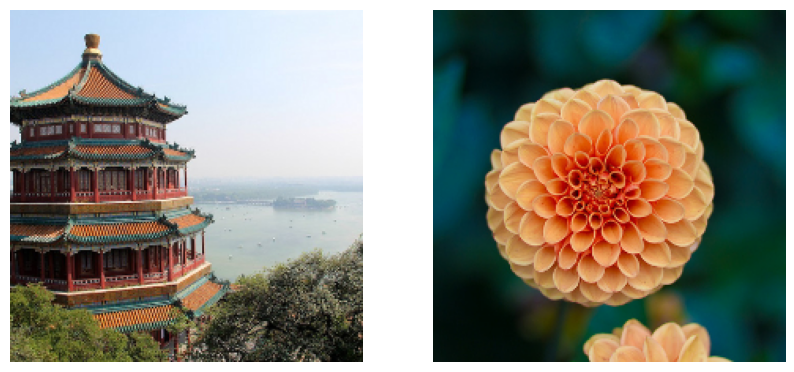

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for idx in (0, 1):
    plt.subplot(1, 2, idx + 1)
    plt.imshow(images_resized[idx] / 255)
    plt.axis("off")

plt.show()

### 14.8 Transfer Learning(Using Pretrained Models)

- sometimes, if we do not have enough data, we can perform the transfer learning


In [4]:
import tensorflow_datasets as tfds

dataset, info = tfds.load('tf_flowers', as_supervised = True, with_info = True)
dataset_size = info.splits['train'].num_examples

class_names = info.features['label'].names
n_classes = info.features['label'].num_classes

dataset_size

3670

In [5]:
class_names

['dandelion', 'daisy', 'tulips', 'sunflowers', 'roses']

In [6]:
n_classes

5

In [7]:
test_set_raw, valid_set_raw, train_set_raw = tfds.load(
    "tf_flowers",
    split=["train[:10%]", "train[10%:25%]", "train[25%:]"],
    as_supervised=True)

2025-02-02 15:35:23.072863: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2025-02-02 15:35:23.076476: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


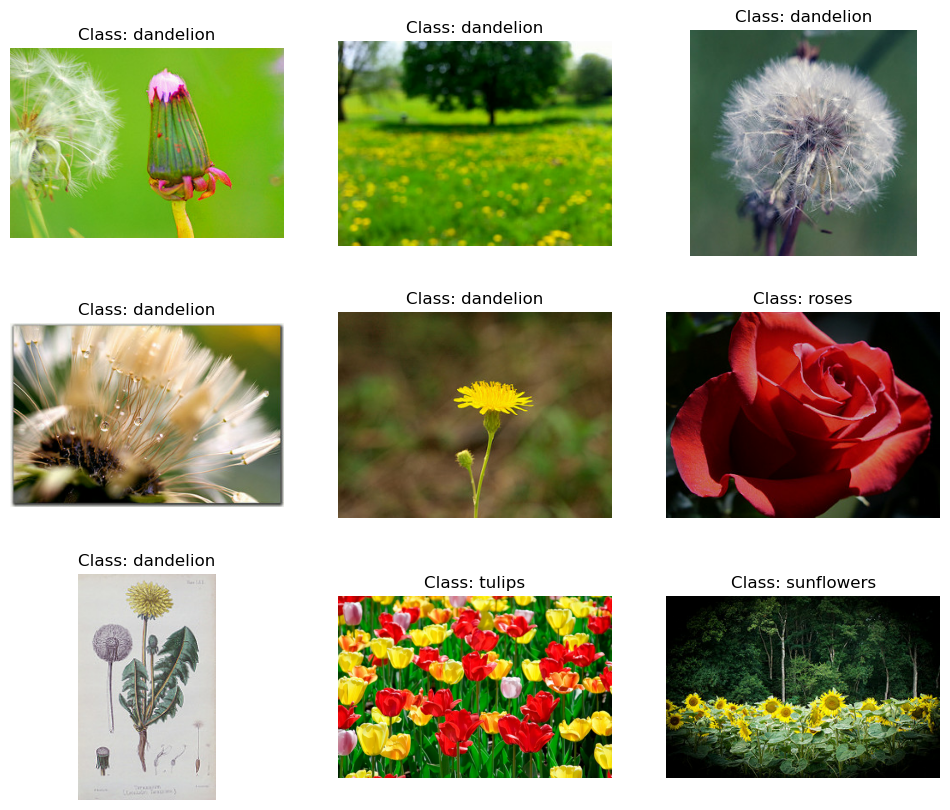

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
index = 0
for image, label in valid_set_raw.take(9):
    index += 1
    plt.subplot(3, 3, index)
    plt.imshow(image)
    plt.title(f"Class: {class_names[label]}")
    plt.axis("off")

plt.show()